In [1]:
import pandas as pd
df=pd.read_csv("advertising_dataset.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                          2.7612
Method:                          IRLS   Log-Likelihood:                -383.34
Date:                Tue, 02 Jul 2024   Deviance:                       541.20
Time:                        09:52:46   Pearson chi2:                     541.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1305      0.117    128.771      0.0

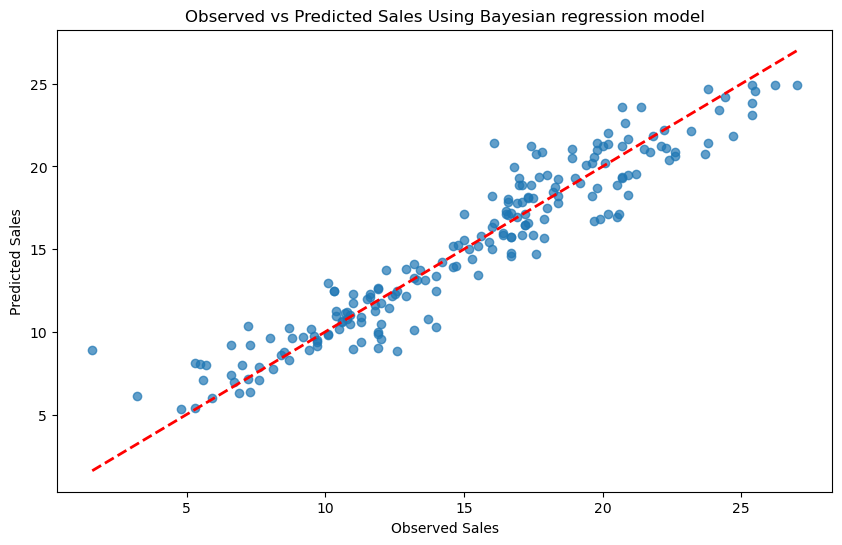

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the CSV dataset
data = pd.read_csv('advertising_dataset.csv')

# Extracting the features and target variable
X = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values

# Normalizing the features for better convergence
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

# Adding a constant term for the intercept in the regression model
X_with_const = sm.add_constant(X_norm)

# Fit the Bayesian regression model
model = sm.GLM(y, X_with_const, family=sm.families.Gaussian())
results = model.fit()

# Displaying the results
print(results.summary())

y_pred = results.predict(X_with_const)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Observed Sales')
plt.ylabel('Predicted Sales')
plt.title('Observed vs Predicted Sales Using Bayesian regression model')
plt.show()

In [7]:
data


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


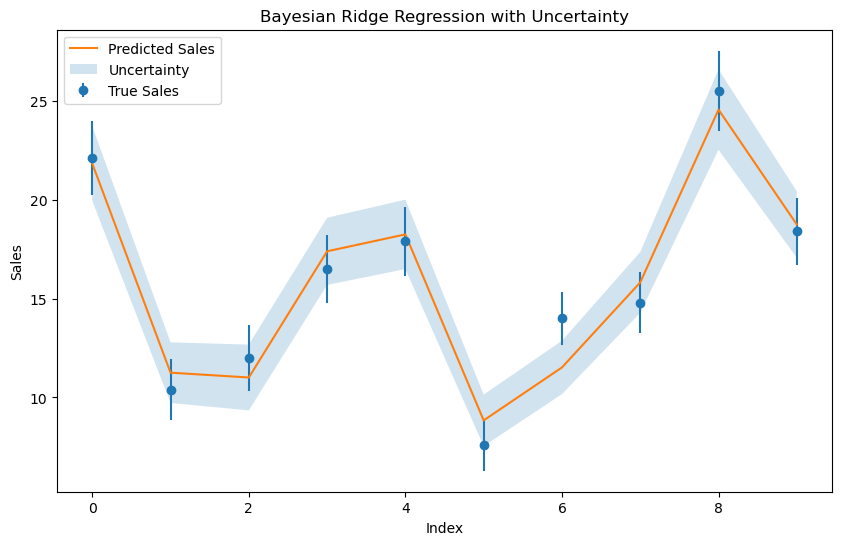

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge

# Load the dataset
data = {
    'TV': [230.1, 44.5, 17.2, 151.5, 180.8, 38.2, 94.2, 177.0, 283.6, 232.1],
    'Radio': [37.8, 39.3, 45.9, 41.3, 10.8, 3.7, 4.9, 9.3, 42.0, 8.6],
    'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4, 13.8, 8.1, 6.4, 66.2, 8.7],
    'Sales': [22.1, 10.4, 12.0, 16.5, 17.9, 7.6, 14.0, 14.8, 25.5, 18.4]
}

df = pd.DataFrame(data)

# Define the features and the target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Fit the Bayesian Ridge Regression model
model = BayesianRidge()
model.fit(X, y)

# Make predictions
y_pred, y_std = model.predict(X, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(y)), y, yerr=y_std, fmt='o', label='True Sales')
plt.plot(range(len(y)), y_pred, label='Predicted Sales')
plt.fill_between(range(len(y)), y_pred - y_std, y_pred + y_std, alpha=0.2, label='Uncertainty')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.title('Bayesian Ridge Regression with Uncertainty')
plt.show()


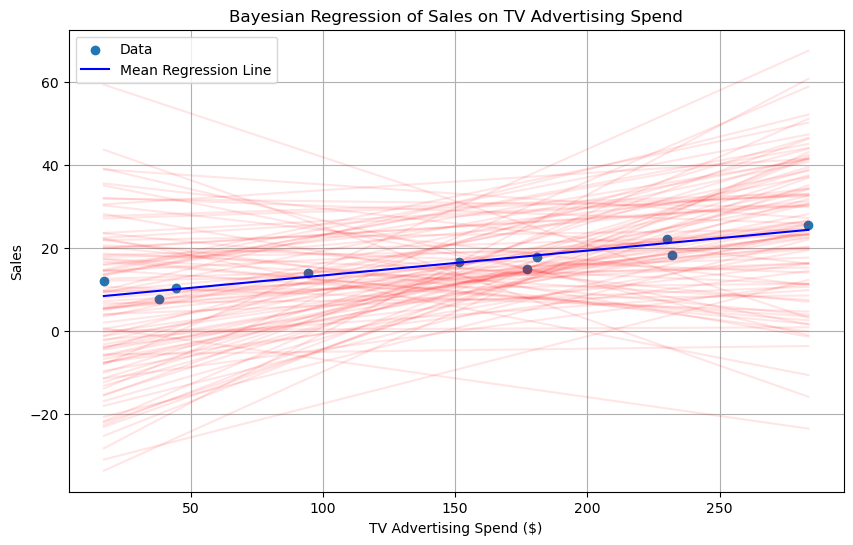

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, norm

# Create the advertising dataset
data = {
    'TV': [230.1, 44.5, 17.2, 151.5, 180.8, 38.2, 94.2, 177.0, 283.6, 232.1],
    'Radio': [37.8, 39.3, 45.9, 41.3, 10.8, 3.7, 4.9, 9.3, 42.0, 8.6],
    'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4, 13.8, 8.1, 6.4, 66.2, 8.7],
    'Sales': [22.1, 10.4, 12.0, 16.5, 17.9, 7.6, 14.0, 14.8, 25.5, 18.4]
}
df = pd.DataFrame(data)

# Use TV advertising data as predictor
X = df['TV'].values
y = df['Sales'].values

# Standardize the predictor
X_standardized = (X - X.mean()) / X.std()

# Perform linear regression using scipy to get initial estimates
slope, intercept, _, _, _ = linregress(X_standardized, y)

# Bayesian linear regression assuming normal priors
alpha_prior = norm(loc=intercept, scale=10)
beta_prior = norm(loc=slope, scale=10)
sigma_prior = norm(loc=0, scale=1)

# Number of samples for the posterior
n_samples = 1000

# Sample from the posterior distributions
alpha_samples = alpha_prior.rvs(n_samples)
beta_samples = beta_prior.rvs(n_samples)
sigma_samples = np.abs(sigma_prior.rvs(n_samples))

# Predictive distribution
X_pred = np.linspace(X.min(), X.max(), 100)
X_pred_standardized = (X_pred - X.mean()) / X.std()
y_preds = np.array([alpha_samples[i] + beta_samples[i] * X_pred_standardized for i in range(n_samples)])

# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot of the data
plt.scatter(X, y, label='Data')

# Plot regression lines from posterior samples
for i in range(0, n_samples, int(n_samples / 100)):  # plot a subset of lines
    plt.plot(X_pred, y_preds[i], color='red', alpha=0.1)

# Plot the mean regression line
y_pred_mean = alpha_samples.mean() + beta_samples.mean() * X_pred_standardized
plt.plot(X_pred, y_pred_mean, color='blue', label='Mean Regression Line')

plt.xlabel('TV Advertising Spend ($)')
plt.ylabel('Sales')
plt.legend()
plt.title('Bayesian Regression of Sales on TV Advertising Spend')
plt.grid(True)
plt.show()
